In [1]:
from tqdm.notebook import tqdm
import numpy as np
from numpy import log, exp, sqrt
import matplotlib.pyplot as plt

import torch

import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))
from src.util import (
    generate_heston_paths, 
    generate_gbm_paths,
    get_mc_price,
    plot_exercise_boundary
)

from src.model import Environment, Agent

Episode:   0%|          | 0/3000 [00:00<?, ?it/s]

Episode 0/3000, Total Reward: 0.00, Moving Avg Reward: 0.00, Moving Avg Holding: 5.00, Epsilon: 0.9850
Episode 100/3000, Total Reward: 0.66, Moving Avg Reward: 1.34, Moving Avg Holding: 1.98, Epsilon: 0.5967
Episode 200/3000, Total Reward: 0.00, Moving Avg Reward: 1.73, Moving Avg Holding: 3.46, Epsilon: 0.3615
Episode 300/3000, Total Reward: 0.00, Moving Avg Reward: 2.43, Moving Avg Holding: 6.84, Epsilon: 0.2190
Episode 400/3000, Total Reward: 0.00, Moving Avg Reward: 1.93, Moving Avg Holding: 11.55, Epsilon: 0.1326
Episode 500/3000, Total Reward: 8.51, Moving Avg Reward: 2.42, Moving Avg Holding: 16.24, Epsilon: 0.0804
Episode 600/3000, Total Reward: 7.52, Moving Avg Reward: 4.54, Moving Avg Holding: 22.69, Epsilon: 0.0487
Episode 700/3000, Total Reward: 5.25, Moving Avg Reward: 6.46, Moving Avg Holding: 47.94, Epsilon: 0.0295
Episode 800/3000, Total Reward: 7.16, Moving Avg Reward: 6.20, Moving Avg Holding: 63.17, Epsilon: 0.0179
Episode 900/3000, Total Reward: 4.05, Moving Avg Rew

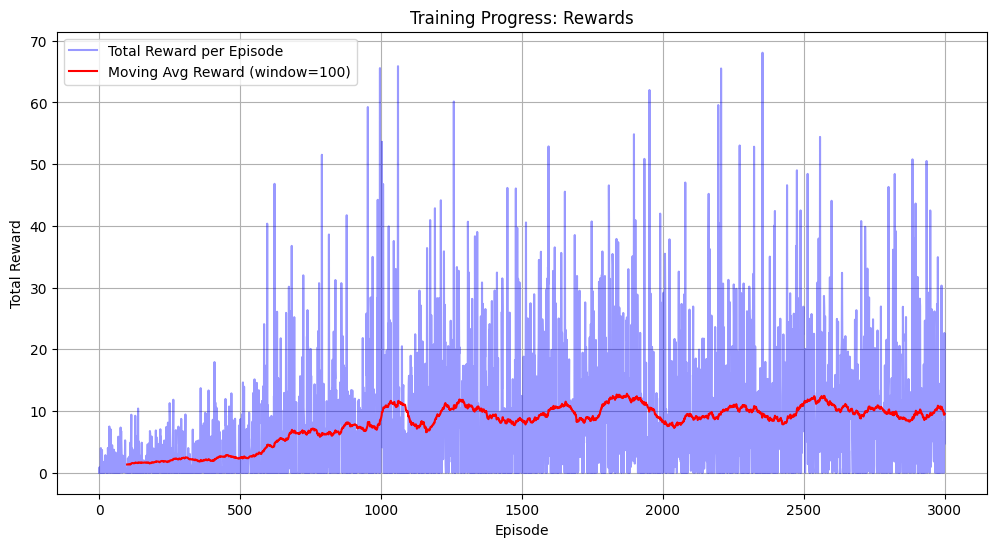

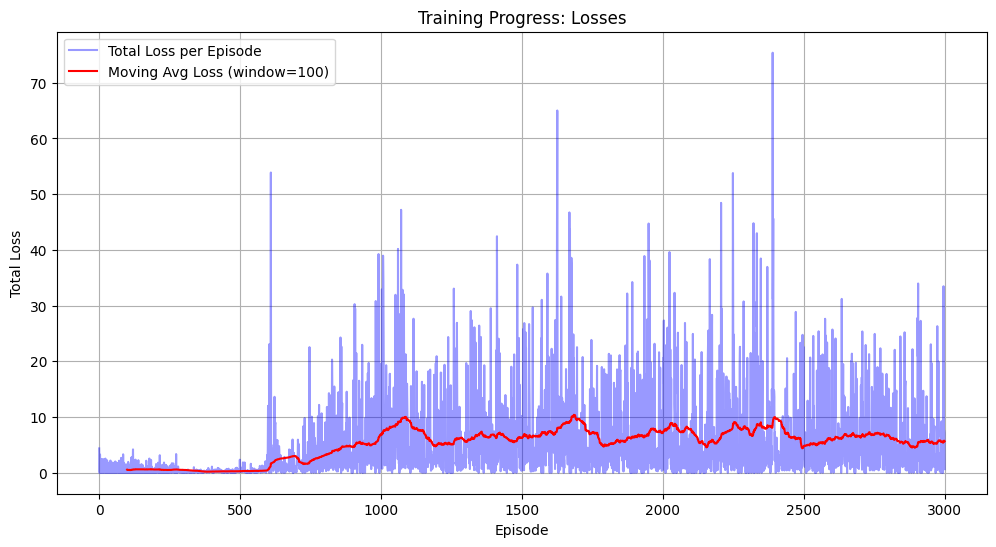

In [2]:
call = lambda x, k: np.maximum(x-k, 0)
put  = lambda x, k: np.maximum(k-x, 0)

nsim = 10000; nstep = 365
t1 = 0; t2 = 1
s_0 = 100; r = 0.04; q = 0.00
path_kwargs = dict(v=0.40)
k = 100

env = Environment(
    nsim=nsim, nstep=nstep, t1=t1, t2=t2, s_0=s_0, r=r, q=q,
    path_kwargs=path_kwargs, h=put, k=k, gbm=True
)

agent = Agent(
    env=env, hidden_dim=128, depth=3, lr=0.001, buffer_size=10000, batch_size=64,
    buffer_interval=8, model_interval=50, gamma=0.99, eps=0.99, eps_decay=0.995, eps_min=0.01
)

losses, rewards = agent.train(nepisode=3000, notebook=True)

In [3]:
get_mc_price(prices=env.prices, t1=t1, t2=t2, h=put, k=k, r=r)

13.526992666811571

In [4]:
Agent.eval(agent, 500, True)

Episode:   0%|          | 0/500 [00:00<?, ?it/s]

11.039584692661201

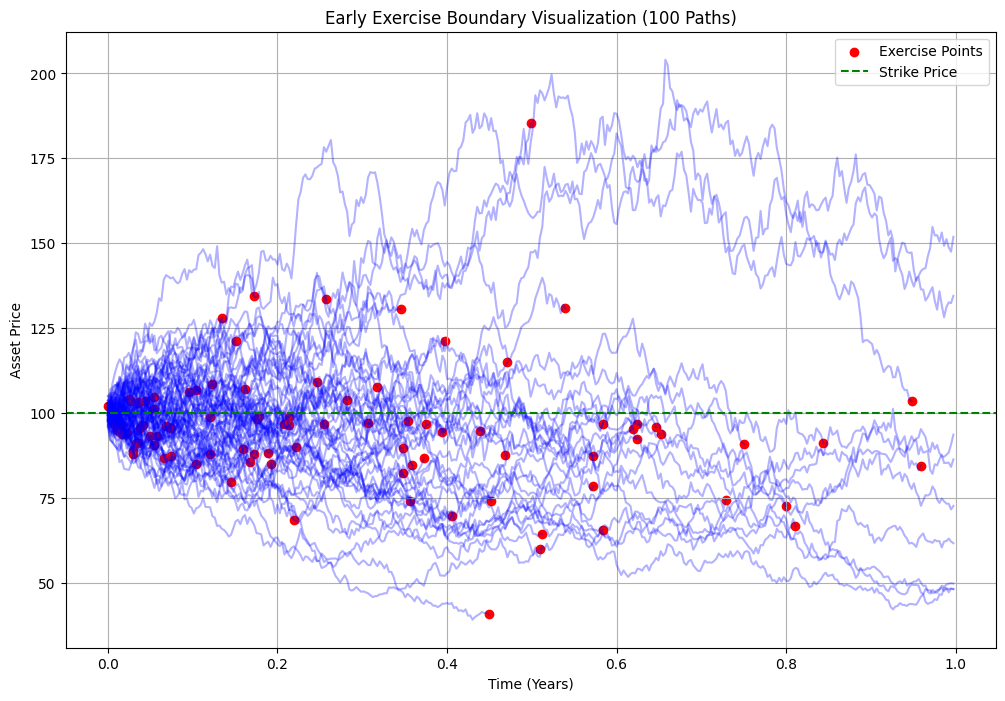

In [5]:
plot_exercise_boundary(agent, env, 100, 100)

Sandbox

In [6]:
# fig, ax = plt.subplots(1, 2, figsize=(12, 4))
# ax[0].plot(losses); ax[1].plot(rewards)
# plt.tight_layout()

# seed = 1
# rng = np.random.default_rng(seed=seed)

# prices = generate_gbm_paths(rng=rng, nsim=nsim, nstep=nstep, t1=t1, t2=t2, s_0=s_0, r=r, q=q, v=v)

# get_mc_price(prices=prices, t1=t1, t2=t2, h=put, k=k, r=r)